In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09


In [4]:
df_k = df[['periode','kas_kantor','cash_in_kantor','cash_out_kantor']].rename(columns={'periode':'ds',
                                                                                      'kas_kantor':'y'})

In [5]:
df_k['ds'] = pd.to_datetime(df_k['ds'], dayfirst=True)
df_k.tail()

,ds,y,cash_in_kantor,cash_out_kantor
420,2020-09-26,1.123736e+13,0.000000e+00,0.000000e+00
421,2020-09-27,1.122373e+13,6.466720e+10,-7.829833e+10
422,2020-09-28,1.126813e+13,1.264345e+11,-8.203374e+10
423,2020-09-29,1.134856e+13,1.548627e+11,-7.443120e+10
424,2020-09-30,1.140874e+13,1.487817e+11,-8.860700e+10


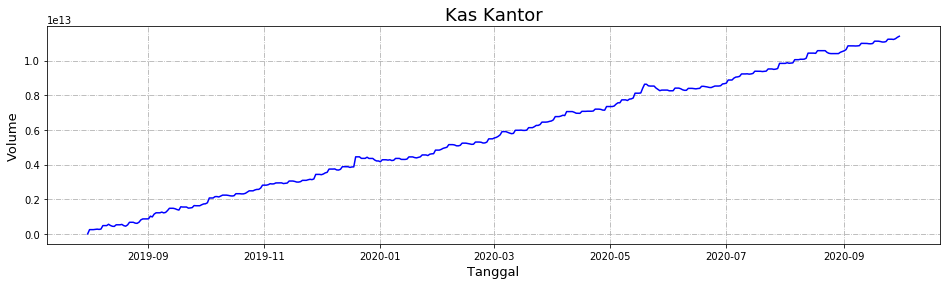

In [6]:
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

plt.plot(df_k.ds, df_k.y, 'b')

plt.title('Kas Kantor', fontsize=18)
plt.ylabel('Volume', fontsize=13)
plt.xlabel('Tanggal', fontsize=13)

plt.show()

In [8]:
cash_in = df[['periode','cash_in_kantor']].rename(columns={'periode':'ds','cash_in_kantor':'y'})

In [9]:
cash_in['ds'] = pd.to_datetime(cash_in['ds'], dayfirst=True)
cash_in.tail()

,ds,y
420,2020-09-26,0.000000e+00
421,2020-09-27,6.466720e+10
422,2020-09-28,1.264345e+11
423,2020-09-29,1.548627e+11
424,2020-09-30,1.487817e+11


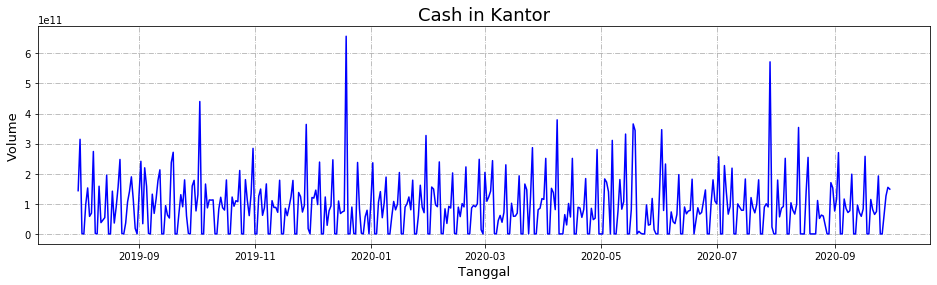

In [10]:
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

plt.plot(cash_in.ds, cash_in.y, 'b')

plt.title('Cash in Kantor', fontsize=18)
plt.ylabel('Volume', fontsize=13)
plt.xlabel('Tanggal', fontsize=13)

plt.show()

In [11]:
from fbprophet import hdays

In [12]:
holidays_indo = hdays.Indonesia()
holidays_indo._populate(2020)
pd.DataFrame([holidays_indo], index=['holiday']).T.rename_axis('ds').reset_index()

C:\Users\HP\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


,ds,holiday
0,2020-01-01,New Year's Day
1,2020-01-25,Chinese New Year
2,2020-03-22,Ascension of the Prophet
3,2020-05-01,Labor Day
4,2020-05-21,Ascension of Jesus
5,2020-05-07,Buddha's Birthday
6,2020-06-01,Pancasila Day
7,2020-05-25,Eid al-Fitr
8,2020-08-17,Independence Day
9,2020-08-20,Islamic New Year


In [13]:
holiday = pd.DataFrame({'ds': pd.to_datetime(['2020-01-01','2020-01-25','2020-03-22','2020-05-01','2020-05-21','2020-05-07','2020-06-01','2020-05-25','2020-08-17','2020-08-20','2020-10-29']),
                       'holiday': ["New Year's Day","Chinese New Year","Ascension of the Prophet","Labor Day","Ascension of Jesus","Buddha's Birthday","Pancasila Day","Eid al-Fitr","Independence Day","Islamic New Year","Birth of the Prophet"]})

In [14]:
cash_in_model = Prophet(changepoint_prior_scale=0.25, seasonality_mode='multiplicative', holidays=holiday, n_changepoints=20, changepoint_range=0.9)

In [15]:
cash_in_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
cash_in_model.fit(cash_in)

future = cash_in_model.make_future_dataframe(periods=31, freq='D')
forecast_in_model = cash_in_model.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\HP\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


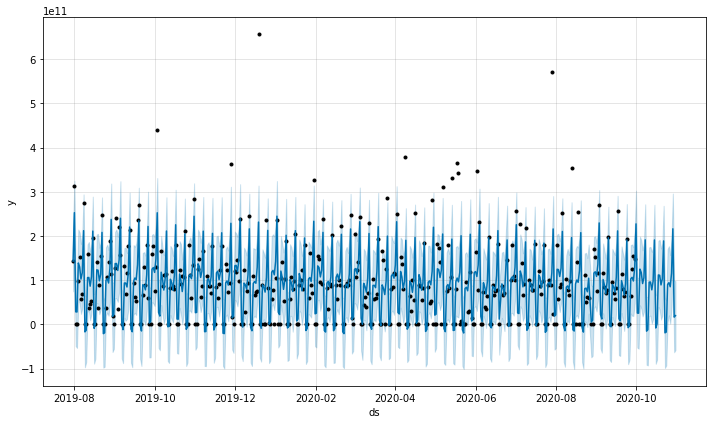

In [16]:
_ = cash_in_model.plot(forecast_in_model)

In [17]:
forecasted_cash_in = forecast_in_model[['ds','yhat']].tail(31) \
.rename(columns={'yhat':'cash_in_kantor'})
forecasted_cash_in

,ds,cash_in_kantor
425,2020-10-01,2.275881e+11
426,2020-10-02,2.575744e+10
427,2020-10-03,2.546099e+10
428,2020-10-04,1.252740e+11
429,2020-10-05,1.173338e+11
430,2020-10-06,9.257032e+10
431,2020-10-07,1.057076e+11
432,2020-10-08,1.915191e+11
433,2020-10-09,-1.514020e+10
434,2020-10-10,-1.198420e+10


In [ ]:
cash_out_model = Prophet(changepoint_prior_scale=0.25, seasonality_mode='multiplicative', holidays=holiday, n_changepoints=20, changepoint_range=0.9)